In [1]:
import tkinter
import numpy as np 
import pandas as pd
from numpy import exp,log,sin,cos
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
FnameGdpMxServ="DataMexico\historical_country_Mexico_indicator_GDP_From_Services.json"
f=open(FnameGdpMxServ)
GdpMxServ=json.load(f)
FnameGdpMxAgro="DataMexico\historical_country_Mexico_indicator_GDP_From_Agriculture.json"
fagro=open(FnameGdpMxAgro)
GdpMxAgro=json.load(fagro)
FnameGdpMxMan="DataMexico\historical_country_Mexico_indicator_GDP_From_Manufacturing.json"
fman=open(FnameGdpMxMan)
GdpMxMan=json.load(fman)
FnameGdpMxTrp="DataMexico\historical_country_Mexico_indicator_GDP_From_Transport.json"
ftrp=open(FnameGdpMxTrp)
GdpMxTrp=json.load(ftrp)
FnameGdpMxCtr="DataMexico\historical_country_Mexico_indicator_GDP_From_Construction.json"
fCtr=open(FnameGdpMxCtr)
GdpMxCtr=json.load(fCtr)
FnameGdpMxMini="DataMexico\historical_country_Mexico_indicator_GDP_From_Mining.json"
fmini=open(FnameGdpMxMini)
GdpMxMini=json.load(fmini)

GdpMxTrpDF=pd.DataFrame(GdpMxTrp)
GdpMxTrpDF=GdpMxTrpDF[0:116]
GdpMxCtrDF=pd.DataFrame(GdpMxCtr)
GdpMxCtrDF=GdpMxCtrDF[0:116]
GdpMxMiniDF=pd.DataFrame(GdpMxMini)
GdpMxMiniDF=GdpMxMiniDF[0:116]

In [3]:
import os

def loadGDPFiles(Path):
    dataGdp={"All":[]}
    for fname in os.listdir(Path):  
        fid=open(Path+fname)
        dataTmp=pd.DataFrame(json.load(fid))
        key=dataTmp['Category'][0]
        print(key)
        dataGdp[key]=dataTmp
    return dataGdp
dataGdp=loadGDPFiles('DataMexico/')
dataGdp.keys()

GDP
GDP Constant Prices
GDP From Agriculture
GDP From Construction
GDP From Manufacturing
GDP From Mining
GDP From Public Administration
GDP From Services
GDP From Transport
GDP From Utilities
GDP per capita


dict_keys(['All', 'GDP', 'GDP Constant Prices', 'GDP From Agriculture', 'GDP From Construction', 'GDP From Manufacturing', 'GDP From Mining', 'GDP From Public Administration', 'GDP From Services', 'GDP From Transport', 'GDP From Utilities', 'GDP per capita'])

In [4]:
dataGdp.update

<function dict.update>

In [5]:
GdpMxServDF=pd.DataFrame(GdpMxServ)
GdpMxServDF=GdpMxServDF[0:116]

GdpMxServDF=GdpMxServDF.assign(DateTime=pd.to_datetime(GdpMxServDF.DateTime,infer_datetime_format=True).apply(lambda s:s.year),
                  Quarter=29*[1,2,3,4]).drop(columns=['HistoricalDataSymbol','Country','Category','LastUpdate'])
GdpMxServDF.head()

,DateTime,Value,Frequency,Quarter
0,1993,5606905.887,Quarterly,1
1,1993,5826191.444,Quarterly,2
2,1993,5653699.256,Quarterly,3
3,1993,5782107.893,Quarterly,4
4,1994,5770392.699,Quarterly,1


In [6]:
GdpMxManDF=pd.DataFrame(GdpMxMan)
GdpMxManDF=GdpMxManDF[0:116]

GdpMxManDF=GdpMxManDF.assign(DateTime=pd.to_datetime(GdpMxManDF.DateTime,infer_datetime_format=True).apply(lambda s:s.year),
                  Quarter=29*[1,2,3,4]).drop(columns=['HistoricalDataSymbol','Country','Category','LastUpdate'])
GdpMxManDF.head()

,DateTime,Value,Frequency,Quarter
0,1993,1689645,Quarterly,1
1,1993,1665391,Quarterly,2
2,1993,1653018,Quarterly,3
3,1993,1715589,Quarterly,4
4,1994,1677197,Quarterly,1


In [7]:
GdpMxAgroDF=pd.DataFrame(GdpMxAgro)
GdpMxAgroDF=GdpMxAgroDF[0:116]
GdpMxAgroDF=GdpMxAgroDF.assign(DateTime=pd.to_datetime(GdpMxAgroDF.DateTime,infer_datetime_format=True).apply(lambda s:s.year),
                  Quarter=29*[1,2,3,4]).drop(columns=['HistoricalDataSymbol','Frequency','Country','Category','LastUpdate'])
GdpMxAgroDF

,DateTime,Value,Quarter
0,1993,356222.154,1
1,1993,364092.188,2
2,1993,352560.802,3
3,1993,406012.520,4
4,1994,349532.754,1
...,...,...,...
111,2020,700527.887,4
112,2021,573959.829,1
113,2021,623709.989,2
114,2021,520266.396,3


In [8]:
#GdpMxAgroDF=GdpMxAgroDF.set_index(['DateTime']).pivot(columns='Quarter')
#GdpMxAgroDF.head()

<AxesSubplot:xlabel='Quarter', ylabel='Value'>

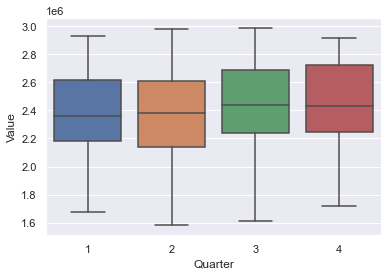

In [9]:
sns.set()

sns.boxplot(x="Quarter",y='Value',data=GdpMxManDF)


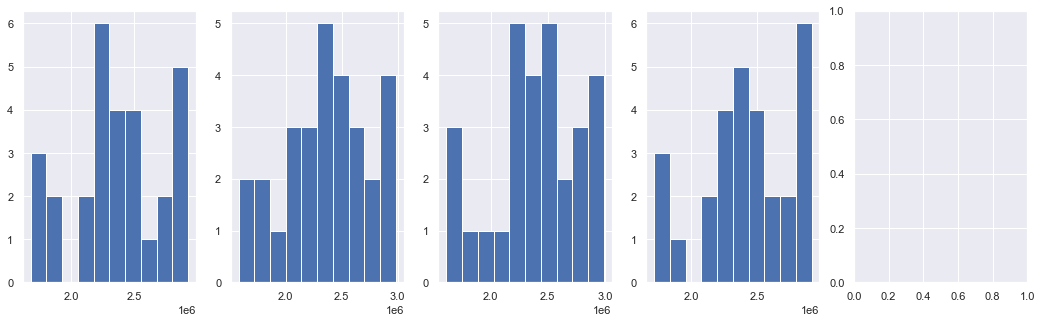

In [10]:
fig,ax=plt.subplots(1,5)
fig.set_size_inches(10,5)
ax[0].hist(GdpMxManDF.Value[GdpMxManDF.Quarter==1])
ax[1].hist(GdpMxManDF.Value[GdpMxManDF.Quarter==2])
ax[2].hist(GdpMxManDF.Value[GdpMxManDF.Quarter==3])
ax[3].hist(GdpMxManDF.Value[GdpMxManDF.Quarter==4])

fig.set_size_inches(18,5)

<AxesSubplot:xlabel='Quarter', ylabel='Value'>

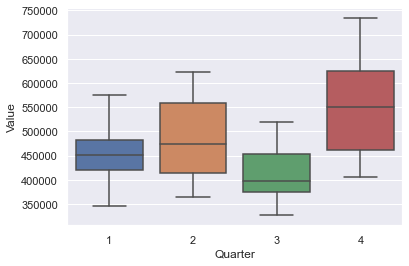

In [11]:
sns.boxplot(x="Quarter",y='Value',data=GdpMxAgroDF)

<AxesSubplot:xlabel='Quarter', ylabel='Value'>

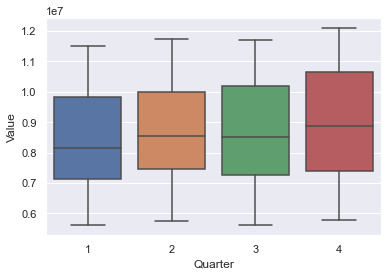

In [12]:
sns.boxplot(x="Quarter",y='Value',data=GdpMxServDF)

In [13]:
GdpMxServDF[82:100]

,DateTime,Value,Frequency,Quarter
82,2013,9.915223e+06,Quarterly,3
83,2013,1.030511e+07,Quarterly,4
84,2014,9.830093e+06,Quarterly,1
85,2014,1.018353e+07,Quarterly,2
86,2014,1.019491e+07,Quarterly,3
87,2014,1.066492e+07,Quarterly,4
88,2015,1.025729e+07,Quarterly,1
89,2015,1.064820e+07,Quarterly,2
90,2015,1.068122e+07,Quarterly,3
91,2015,1.105757e+07,Quarterly,4


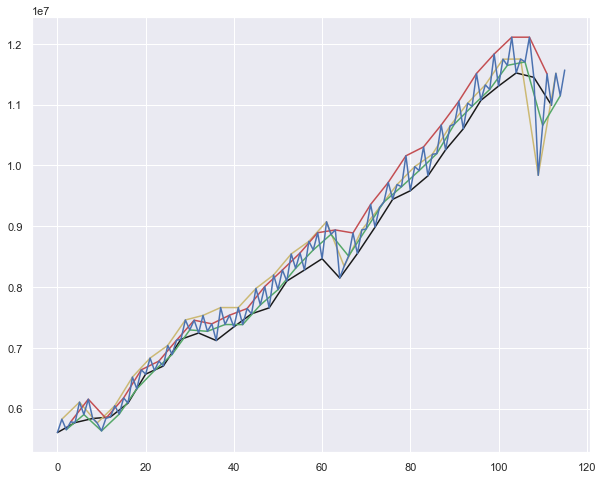

In [26]:
fig,ax=plt.subplots()
fig.set_size_inches(10,8)
ax.plot(GdpMxServDF.Value[0:-1:4],'-k')
ax.plot(GdpMxServDF.Value[1:-1:4],'-y')
ax.plot(GdpMxServDF.Value[2:-1:4],'-g')
ax.plot(GdpMxServDF.Value[3:-1:4],'-r')
ax.plot(GdpMxServDF.Value)


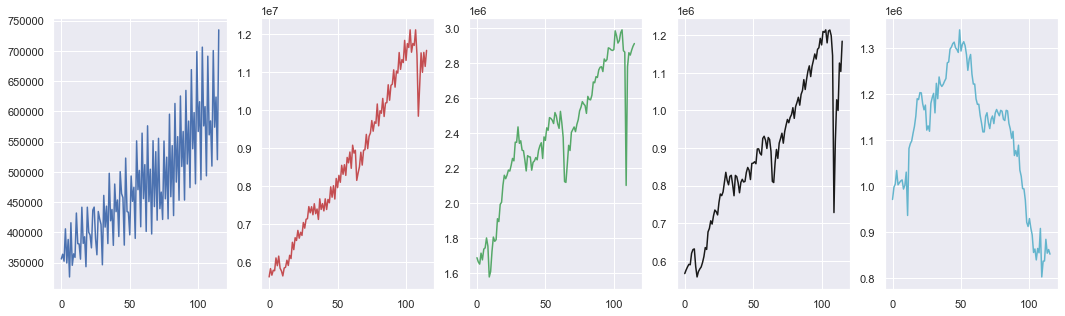

In [15]:
fig,ax=plt.subplots(1,5)
fig.set_size_inches(10,5)
ax[0].plot(GdpMxAgroDF.Value,'-b')
ax[1].plot(GdpMxServDF.Value,'-r')
ax[2].plot(GdpMxManDF.Value,'-g')
ax[3].plot(GdpMxTrpDF.Value,'-k')
ax[4].plot(GdpMxMiniDF.Value,'-c')
fig.set_size_inches(18,5)

In [16]:
GdpMxAgroDF.Value.max()

734723.67

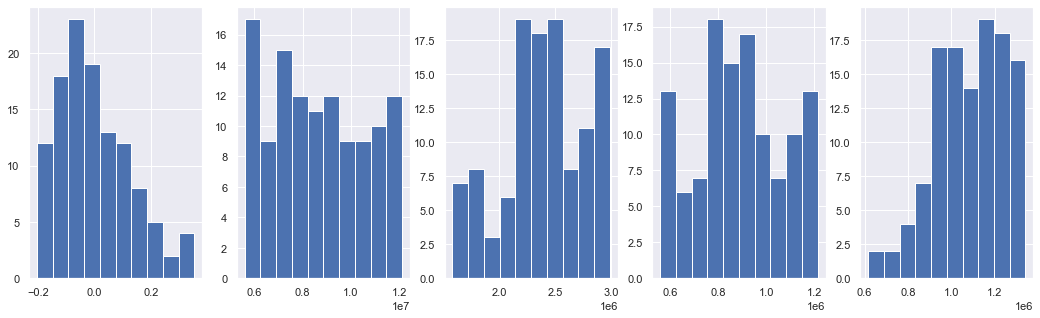

In [17]:
fig,ax=plt.subplots(1,5)
fig.set_size_inches(10,5)
ax[0].hist((GdpMxAgroDF.Value-GdpMxAgroDF.Value.mean())/GdpMxAgroDF.Value.max())
#ax[1].hist((GdpMxAgroDF.Value))
ax[1].hist(GdpMxServDF.Value)
ax[2].hist(GdpMxManDF.Value)
ax[3].hist(GdpMxTrpDF.Value)
ax[4].hist(GdpMxCtrDF.Value)
fig.set_size_inches(18,5)

In [22]:
acf=np.correlate(GdpMxAgroDF.Value,GdpMxAgroDF.Value,mode='full')

array([2.61724848e+11, 4.52837565e+11, 6.70639013e+11, 9.13277688e+11,
       1.14645820e+12, 1.35946231e+12, 1.53374286e+12, 1.79526394e+12,
       2.00550740e+12, 2.20764812e+12, 2.40668078e+12, 2.69236782e+12,
       2.91908089e+12, 3.13367168e+12, 3.32825135e+12, 3.63015889e+12,
       3.83697163e+12, 4.06650657e+12, 4.23528584e+12, 4.54498101e+12,
       4.73645107e+12, 4.97279037e+12, 5.15048627e+12, 5.45670807e+12,
       5.65668231e+12, 5.87648738e+12, 6.04001036e+12, 6.35180801e+12,
       6.52825085e+12, 6.76587727e+12, 6.90509357e+12, 7.24337957e+12,
       7.39058667e+12, 7.64927815e+12, 7.79028157e+12, 8.15938256e+12,
       8.28635866e+12, 8.55040827e+12, 8.66927004e+12, 9.04234820e+12,
       9.14772055e+12, 9.42954316e+12, 9.52455351e+12, 9.91864800e+12,
       1.00323138e+13, 1.03185744e+13, 1.04184819e+13, 1.08454727e+13,
       1.09185804e+13, 1.11956112e+13, 1.12824524e+13, 1.17091477e+13,
       1.17855431e+13, 1.20995039e+13, 1.21696922e+13, 1.26582759e+13,
      

C:\Users\Andre\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


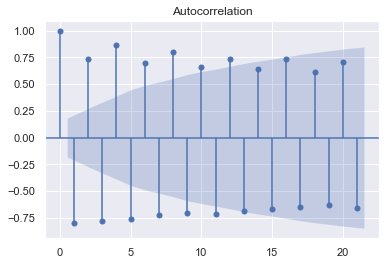

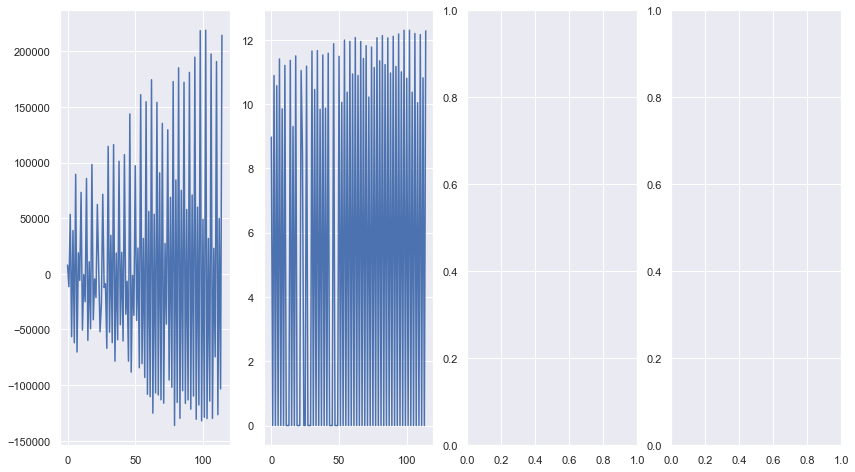

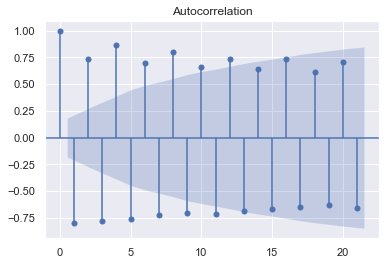

In [60]:
fig,ax=plt.subplots(1,4)
fig.set_size_inches(14,8)

ax[0].plot((np.diff(GdpMxAgroDF.Value)))
ax[1].plot(np.log(pd.Series(np.diff(GdpMxAgroDF.Value))).fillna(0))
plot_acf(np.log(pd.Series(np.diff(GdpMxAgroDF.Value))).fillna(0))

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

ModuleNotFoundError: No module named 'rpy2'